In [ ]:
!pip install geopy
!pip install geohash2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans
import seaborn as sns
import geohash2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/California House Prices Prediction/housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Q1 Explore the data set and display summary statistics of the data. What can you learn from it on the data?

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
df.shape

(20640, 10)

In [ ]:
grouped_by_ocean_proximity_statistics = df.groupby("ocean_proximity")[
    ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
].agg(["mean", "std"])
grouped_by_ocean_proximity_statistics

housing_median_age             total_rooms               \
                              mean        std         mean          std   
ocean_proximity                                                           
<1H OCEAN                29.279225  11.644453  2628.343586  2160.463696   
INLAND                   24.271867  12.018020  2717.742787  2385.831111   
ISLAND                   42.400000  13.164346  1574.600000   707.545264   
NEAR BAY                 37.730131  13.070385  2493.589520  1830.817022   
NEAR OCEAN               29.347254  11.840371  2583.700903  1990.724760   

                total_bedrooms               population               \
                          mean         std         mean          std   
ocean_proximity                                                        
<1H OCEAN           546.539185  427.911417  1520.290499  1185.848357   
INLAND              533.881619  446.117778  1391.046252  1168.670126   
ISLAND              420.400000  169.320111   668.000000   301.691067   
NEAR BAY            514.182819  367.887605  1230.317467   885.899035   
NEAR OCEAN          538.615677  376.320045  1354.008653  1005.563166   

                 households             median_income            \
                       mean         std          mean       std   
ocean_proximity                                                   
<1H OCEAN        517.744965  392.280718      4.230682  2.001223   
INLAND           477.447565  392.252095      3.208996  1.437465   
ISLAND           276.600000  113.200265      2.744420  0.444180   
NEAR BAY         488.616157  350.598369      4.172885  2.017427   
NEAR OCEAN       501.244545  344.445256      4.005785  2.010558   

                median_house_value                 
                              mean            std  
ocean_proximity                                    
<1H OCEAN            240084.285464  106124.292213  
INLAND               124805.392001   70007.908494  
ISLAND               380440.000000   80559.561816  
NEAR BAY             259212.311790  122818.537064  
NEAR OCEAN           249433.977427  122477.145927

In [ ]:
df.groupby("ocean_proximity").agg({"ocean_proximity": "count"})

,ocean_proximity
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
ISLAND,5
NEAR BAY,2290
NEAR OCEAN,2658


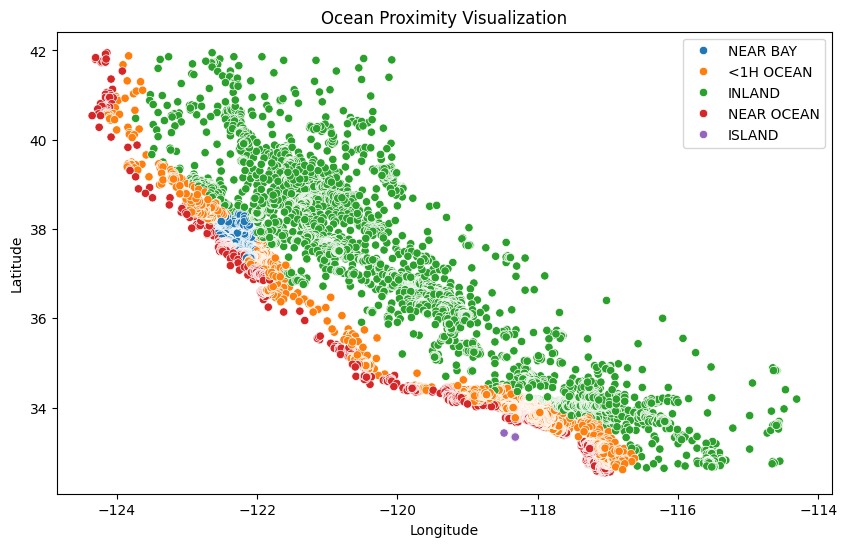

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['longitude'], y=df['latitude'], hue=df['ocean_proximity'], palette='tab10', legend='full')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Ocean Proximity Visualization")
plt.legend()
plt.show()

32


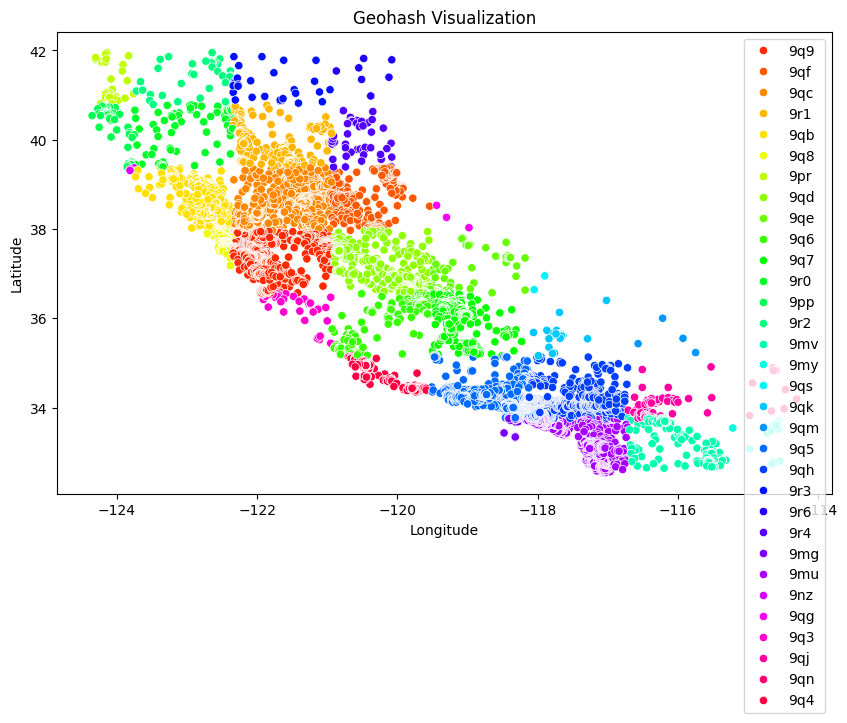

In [ ]:
geocodes = df.apply(lambda row: geohash2.encode(row["latitude"], row["longitude"], precision=3), axis=1)
print(len(geocodes.unique()))
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['longitude'], y=df['latitude'], hue=geocodes, palette='hsv')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geohash Visualization")
plt.legend()
plt.show()

5


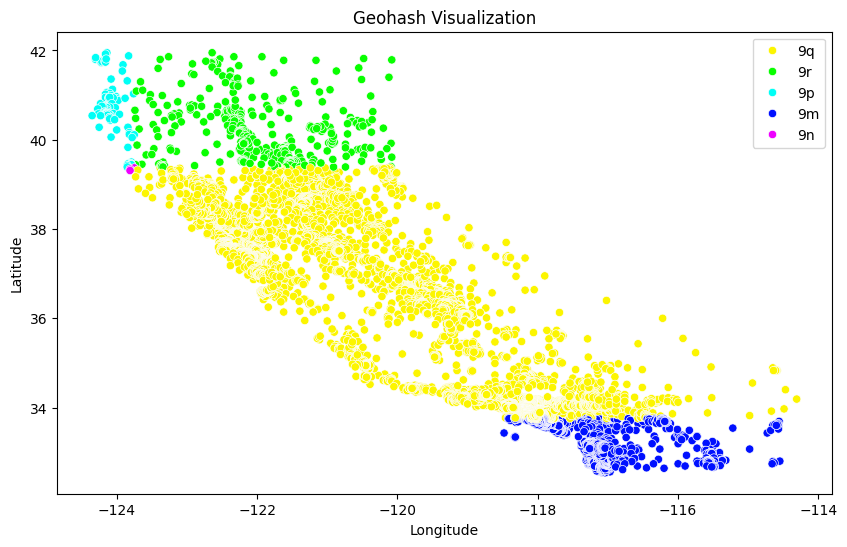

In [ ]:
geocodes = df.apply(lambda row: geohash2.encode(row["latitude"], row["longitude"], precision=2), axis=1)
print(len(geocodes.unique()))
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['longitude'], y=df['latitude'], hue=geocodes, palette='hsv')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geohash Visualization")
plt.legend()
plt.show()

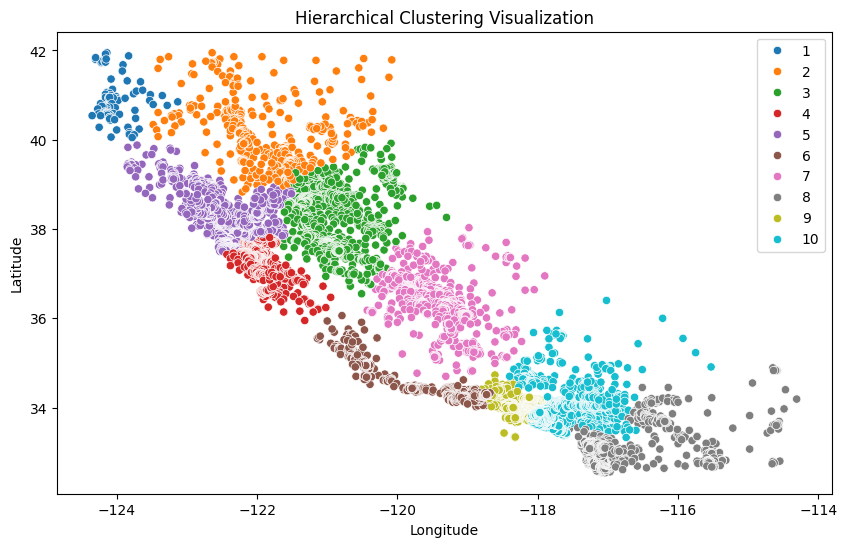

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
linkage_matrix = linkage(df[['latitude', 'longitude']], method='ward')
hierarchical_cluster = fcluster(linkage_matrix, t=10, criterion='maxclust')

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['longitude'], y=df['latitude'], hue=hierarchical_cluster, palette='tab10', legend='full')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hierarchical Clustering Visualization")
plt.legend()
plt.show()

In [ ]:
df['geographic_clusters'] = hierarchical_cluster
df.groupby(["geographic_clusters"])[
    ["housing_median_age", "total_rooms", "population", "median_income", "median_house_value"]
].agg(["mean", "min","max","std"])

housing_median_age                         total_rooms  \
                                  mean   min   max        std         mean   
geographic_clusters                                                          
1                            29.851351  11.0  52.0  11.330151  1989.959459   
2                            24.245283   2.0  52.0  10.479068  2248.900515   
3                            24.960596   1.0  52.0  12.455320  2551.481980   
4                            28.095967   2.0  52.0  11.360045  2758.681966   
5                            34.472003   1.0  52.0  14.321174  2566.193748   
6                            23.784946   3.0  52.0  10.544919  2930.455197   
7                            25.248834   2.0  52.0  11.466289  2265.777605   
8                            22.973368   2.0  52.0  11.190934  2935.308094   
9                            35.021400   2.0  52.0   9.903415  2294.448429   
10                           23.095898   1.0  52.0  10.942905  3161.874399   

                                                   population                 \
                       min      max          std         mean   min      max   
geographic_clusters                                                            
1                    141.0   5694.0   830.512119   977.979730  47.0   3546.0   
2                     36.0  14631.0  1540.823825  1088.602058  18.0   7517.0   
3                     19.0  39320.0  2280.126179  1265.388755   9.0  16305.0   
4                     18.0  32627.0  2161.160608  1458.564673   8.0  28566.0   
5                      8.0  18634.0  1820.662450  1252.863621  11.0   9879.0   
6                     26.0  30405.0  2454.886516  1523.713262  29.0  12873.0   
7                     37.0  13802.0  1477.089722  1267.423017  13.0   7679.0   
8                     16.0  25135.0  2549.263882  1498.006266   5.0  35682.0   
9                     11.0  25957.0  1762.281561  1444.836322   3.0  10475.0   
10                     2.0  37937.0  2795.488326  1682.505799   6.0  16122.0   

                                 median_income                             \
                             std          mean     min      max       std   
geographic_clusters                                                         
1                     456.086435      2.443059  0.7684   5.0329  0.784674   
2                     775.903880      2.471563  0.4999   6.1359  0.833921   
3                    1099.066500      3.188521  0.4999  10.9891  1.274023   
4                    1261.296121      4.841692  0.7068  15.0001  2.137040   
5                     894.782865      4.045649  0.4999  15.0001  1.837729   
6                    1189.717903      4.217235  0.7025  12.6320  1.704385   
7                     803.109192      2.804766  0.4999  10.5941  1.279331   
8                    1387.652728      3.624841  0.5360  15.0001  1.692705   
9                     980.783555      3.846064  0.4999  15.0001  2.062201   
10                   1367.151146      4.301153  0.4999  15.0001  1.843288   

                    median_house_value                                    
                                  mean      min       max            std  
geographic_clusters                                                       
1                         88766.216216  36700.0  165600.0   23230.154442  
2                         83736.703259  14999.0  225000.0   27515.303128  
3                        128897.886112  22500.0  500001.0   55219.257601  
4                        271327.807603  40000.0  500001.0  108931.367053  
5                        245247.394366  22500.0  500001.0  117113.394466  
6                        252794.324970  28300.0  500001.0  101339.217017  
7                         83748.755832  26600.0  345900.0   35459.225589  
8                        181919.292950  22500.0  500001.0   98528.411431  
9                        244857.396761  17500.0  500001.0  117515.064012  
10                       198699.265347  14999.0  500001.0   99

In [ ]:
df.groupby(["geographic_clusters","ocean_proximity"])[
    ["housing_median_age", "total_rooms", "population", "median_income", "median_house_value"]
].agg(["mean", "min","max"])

housing_median_age              \
                                                  mean   min   max   
geographic_clusters ocean_proximity                                  
1                   <1H OCEAN                28.352941  16.0  52.0   
                    INLAND                   20.428571  15.0  25.0   
                    NEAR OCEAN               30.943925  11.0  52.0   
2                   INLAND                   24.245283   2.0  52.0   
3                   INLAND                   24.960596   1.0  52.0   
4                   <1H OCEAN                25.115652   2.0  52.0   
                    INLAND                   22.610000   3.0  52.0   
                    NEAR BAY                 33.004847   2.0  52.0   
                    NEAR OCEAN               31.350694   7.0  52.0   
5                   <1H OCEAN                25.282258   4.0  52.0   
                    INLAND                   22.153348   1.0  52.0   
                    NEAR BAY                 39.480551   2.0  52.0   
                    NEAR OCEAN               36.330864   6.0  52.0   
6                   <1H OCEAN                23.030660   3.0  52.0   
                    INLAND                   39.000000  39.0  39.0   
                    NEAR OCEAN               24.524272   4.0  52.0   
7                   <1H OCEAN                35.000000  35.0  35.0   
                    INLAND                   25.241245   2.0  52.0   
8                   <1H OCEAN                17.530275   3.0  46.0   
                    INLAND                   19.790625   2.0  50.0   
                    NEAR OCEAN               26.768571   2.0  52.0   
9                   <1H OCEAN                35.039835   2.0  52.0   
                    INLAND                   35.605381   2.0  52.0   
                    ISLAND                   42.400000  27.0  52.0   
                    NEAR OCEAN               34.279412   4.0  52.0   
10                  <1H OCEAN                23.626318   2.0  52.0   
                    INLAND                   22.526210   1.0  52.0   
                    NEAR OCEAN               19.375000   3.0  38.0   

                                     total_rooms                   \
                                            mean     min      max   
geographic_clusters ocean_proximity                                 
1                   <1H OCEAN        1945.176471   544.0   3513.0   
                    INLAND           1348.000000   141.0   2680.0   
                    NEAR OCEAN       2046.186916   334.0   5694.0   
2                   INLAND           2248.900515    36.0  14631.0   
3                   INLAND           2551.481980    19.0  39320.0   
4                   <1H OCEAN        2950.950435    32.0  32627.0   
                    INLAND           3418.620000   127.0  20354.0   
                    NEAR BAY         2376.197092    18.0  16199.0   
                    NEAR OCEAN       2583.875000    32.0  11999.0   
5                   <1H OCEAN        2560.623656   188.0   9772.0   
                    INLAND           2646.401728    19.0  17032.0   
                    NEAR BAY         2537.076002     8.0  18634.0   
                    NEAR OCEAN       2599.753086    15.0  14034.0   
6                   <1H OCEAN        3084.660377   121.0  25187.0   
                    INLAND            768.000000   768.0    768.0   
                    NEAR OCEAN       2777.007282    26.0  30405.0   
7                   <1H OCEAN        2469.000000  2469.0   2469.0   
                    INLAND           2265.619455    37.0  13802.0   
8                   <1H OCEAN        3566.811009    52.0  25135.0   
                    INLAND           3178.753125    18.0  24121.0   
                    NEAR OCEAN       2533.335238    16.0  23915.0   
9                   <1H OCEAN        2257.006495    11.0  25957.0   
                    INLAND           2637.730942   238.0  17339.0   
                    ISLAND           1574.600000   716.0   2359.0   
  

Insights:
1. Coastal areas (NEAR OCEAN, <1H OCEAN, NEAR BAY) have higher house values, have old houses and high median incomes.<br>
2. Inland areas have newer housing, lower house values, and more variability in total rooms/population.<br>
3. ISLAND is a unique case: low population and low median income but extremely high home values (suggesting luxury homes or vacation properties) & oldest housing.<br>
4. Clusters 4, 5, 6, and 10 appear to be wealthier, denser urban areas with high home values and incomes.
5. Clusters 2 and 7 seem to be lower-income, lower house value areas.
6. Cluster 10 has a high density and newer housing stock, possibly a developing area.

Q2 Compute the correlation between each feature and the target median_house_value. Which features have strong correlation with the target?

In [ ]:
# Resetting dataframe
df = pd.read_csv('/content/drive/MyDrive/California House Prices Prediction/housing.csv')
df_ocean_proximity_encoded = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)
df_ocean_proximity_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [ ]:
df_ocean_proximity_encoded.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
ocean_proximity_NEAR BAY,0.160284
ocean_proximity_NEAR OCEAN,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
ocean_proximity_ISLAND,0.023416
population,-0.024650


Q3 Which actions do you need to take in order to prepare the data set for the learning algorithm? Identify at least four such actions.

1. Feature Scaling – Normalize or standardize numerical features like total_rooms, population, and median_income to ensure consistent scales across features.<br>
2. Feature Engineering – Create meaningful derived features to enhance predictive power.<br>
3. Check for Missing Values <br>
4. Apply Feature Selection – Remove features that do not contribute significantly to the prediction task.<br>

Q4 Preprocess the data set using the techniques discussed in class (e.g., imputation of missing values, discretization). Show a sample of the data set before and after the preprocessing.

In [ ]:
df['geographic_clusters'] = hierarchical_cluster
features_to_standardize = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
scaler = StandardScaler()
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

In [ ]:
df_ocean_proximity_encoded = pd.get_dummies(df, columns=["ocean_proximity"])

In [ ]:
df_encoded = pd.get_dummies(df_ocean_proximity_encoded, columns=["geographic_clusters"])

In [ ]:
df_preprocessed = df_encoded.drop(["longitude","latitude"],axis=1)

In [ ]:
# BEFORE PREPROCESSING
df = pd.read_csv('/content/drive/MyDrive/California House Prices Prediction/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df_preprocessed = df_preprocessed.dropna()

In [ ]:
df_preprocessed.shape

(20433, 22)

In [ ]:
# AFTER PREPROCESSING
df_preprocessed.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,geographic_clusters_1,geographic_clusters_2,geographic_clusters_3,geographic_clusters_4,geographic_clusters_5,geographic_clusters_6,geographic_clusters_7,geographic_clusters_8,geographic_clusters_9,geographic_clusters_10
0,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,452600.0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,358500.0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,352100.0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,341300.0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,342200.0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


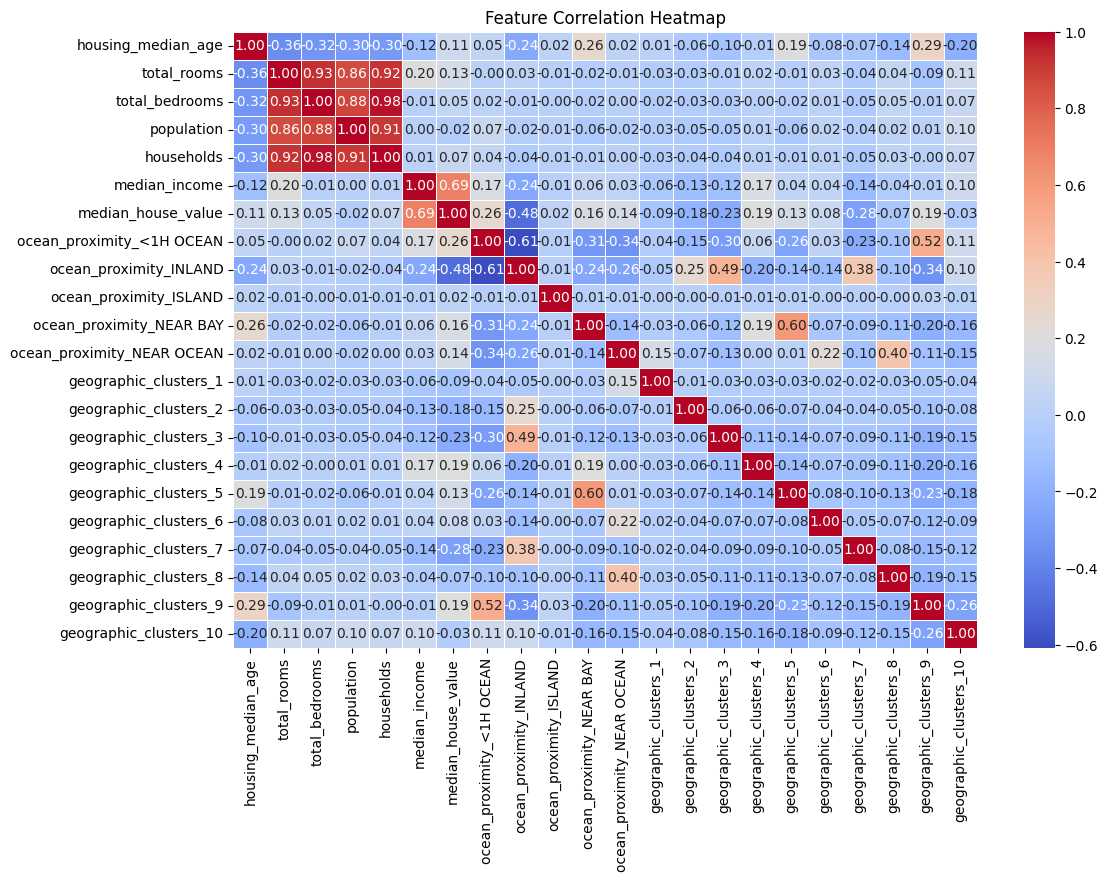

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_preprocessed.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Since the features total_rooms is highly correlated with total_bedrooms, population & households
# Hence these features are dropped
# df_preprocessed = df_preprocessed.drop(["total_bedrooms","population","households"],axis=1)

Q5 Extract at least two new features from the data set that have strong correlation with the target feature.

In [ ]:
df_preprocessed.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
ocean_proximity_<1H OCEAN,0.256617
geographic_clusters_4,0.190867
geographic_clusters_9,0.190798
ocean_proximity_NEAR BAY,0.160284
ocean_proximity_NEAR OCEAN,0.141862
geographic_clusters_5,0.134814
total_rooms,0.134153
housing_median_age,0.105623


In [ ]:
# 2 Features that have strong correlation with target median_house_value are ocean_proximity_INLAND and median_income

Q6 Run linear regression on the transformed data set. Use 80% of the data set as your training set and 20% as your test set. Compute RMSE and R2 score both on the training and the test sets.

In [ ]:
X = df_preprocessed.drop(columns=['median_house_value'])
y = df_preprocessed['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")


Training RMSE: 67180.1670, R²: 0.6590
Test RMSE: 68026.0292, R²: 0.6616


Q7 Does adding regularization improve the results? If yes, which value of λ provides the best R2 score on the test set? If no, what is the reason for it?

In [ ]:
param_grid = {'alpha': [0.01,0.1,0.5,1,10,20,40,60,80,100]}
grid = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2')
grid.fit(X_train, y_train)

best_alpha = grid.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 0.5


In [ ]:
model = Ridge(alpha=0.5)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

Training RMSE: 67181.1432, R²: 0.6590
Test RMSE: 67999.5461, R²: 0.6619


In [ ]:
# Removing total_bedrooms and total_rooms

In [ ]:
df_preprocessed_rmvd = df_preprocessed.drop(["total_bedrooms","total_rooms"],axis=1)
X = df_preprocessed_rmvd.drop(columns=['median_house_value'])
y = df_preprocessed_rmvd['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'alpha': [0.01,0.1,0.5,1,10,20,40,60,80,100]}
grid = GridSearchCV(Ridge(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_alpha = grid.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 0.1


In [ ]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

Training RMSE: 67341.8020, R²: 0.6574
Test RMSE: 68088.4288, R²: 0.6610


In [ ]:
# Ridge regression assumes a linear relationship between features and the target.
# Probably the relationship is nonlinear

Q8 Now replace linear regression with DecisionTreeRegressor (in sklearn.tree). What is the R2 score on the training and test this time? Which phenomenon is observed here?

In [ ]:
X = df_preprocessed.drop(columns=['median_house_value'])
y = df_preprocessed['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'max_depth': [10, 20,30,40,50], 'min_samples_split': [40,50,60,70,80,90]}
grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Best parameters: {grid.best_params_}")
print(f"Training RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 50}
Training RMSE: 58586.0252, R²: 0.7407
Test RMSE: 66413.5742, R²: 0.6775


In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute RMSE and R² for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Compute RMSE and R² for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Training RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

Training RMSE: 0.0000, R²: 1.0000
Test RMSE: 82266.0608, R²: 0.5051


In [ ]:
print(f"Max Depth: {model.max_depth}")
print(f"Min Samples Split: {model.min_samples_split}")

Max Depth: None
Min Samples Split: 2


In [ ]:
# It seems like the best decision tree performs slightly better than the linear regression model
# However the default model overfits to training data.
# Max Depth of None mean tree is grown until all leaves contain fewer samples than min_samples_split